# Make or get image

Requirements:

- `numpy`
- `scipy`
- `matplotlib`
- `pillow`

I recommend installing them with `conda install`. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Choose a colourmap

For reference, here's a list of the colourmaps:

    cmaps = [('Perceptually Uniform Sequential',
                                ['viridis', 'inferno', 'plasma', 'magma']),
             ('Sequential',     ['Blues', 'BuGn', 'BuPu',
                                 'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
                                 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
                                 'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']),
             ('Sequential (2)', ['afmhot', 'autumn', 'bone', 'cool',
                                 'copper', 'gist_heat', 'gray', 'hot',
                                 'pink', 'spring', 'summer', 'winter']),
             ('Diverging',      ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
                                 'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral',
                                 'seismic']),
             ('Qualitative',    ['Accent', 'Dark2', 'Paired', 'Pastel1',
                                 'Pastel2', 'Set1', 'Set2', 'Set3']),
             ('Miscellaneous',  ['gist_earth', 'terrain', 'ocean', 'gist_stern',
                                 'brg', 'CMRmap', 'cubehelix',
                                 'gnuplot', 'gnuplot2', 'gist_ncar',
                                 'nipy_spectral', 'jet', 'rainbow',
                                 'gist_rainbow', 'hsv', 'flag', 'prism'])]

In [3]:
cmap = 'viridis'    # Perceptual
cmap = 'spectral'   # Classic rainbow
cmap = 'seismic'    # Classic diverging
cmap = 'Accent'     # Needs coolinearity constraint
cmap = 'Dark2'      # Needs coolinearity constraint
cmap = 'Paired'     # Needs coolinearity constraint, ultimate test!
cmap = 'gist_ncar'  # Works with new cool-point start location
cmap = 'Pastel1'    # Amazing that it works for start point
cmap = 'Set2'       # Difficult

cmap = 'RdBu'

## Make a synthetic image

Make some fake data in the closed interval [0,1] and apply a colourmap.

In [4]:
from scipy import signal

nx, ny = 100, 100
z = np.random.rand(nx, ny)

sizex, sizey = 30, 30
x, y = np.mgrid[-sizex:sizex+1, -sizey:sizey+1]
g = np.exp(-0.333*(x**2/float(sizex)+y**2/float(sizey)))
f = g/g.sum()

z = signal.convolve(z, f, mode='valid')
z = (z - z.min())/(z.max() - z.min())

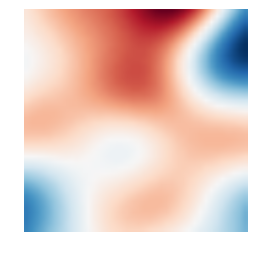

In [5]:
# Interpolation introduces new colours and makes it harder to recover the data.
plt.imshow(z, cmap=cmap)

# Prevent interpolation for the 'pure' experience.
#plt.imshow(z, cmap="spectral", interpolation='none')

plt.axis('off')
plt.savefig('data/test.png', bbox_inches='tight')
plt.show()

## Make a seismic image

Load some seismic data and apply a colourmap.

In [6]:
volume = np.load('data/F3_volume_3x3_16bit.npy')

In [7]:
# Choose a section and transpose it.
x = volume[20].T

# Clip the display at the 99.5% point.
vm = np.percentile(x, 99.5)

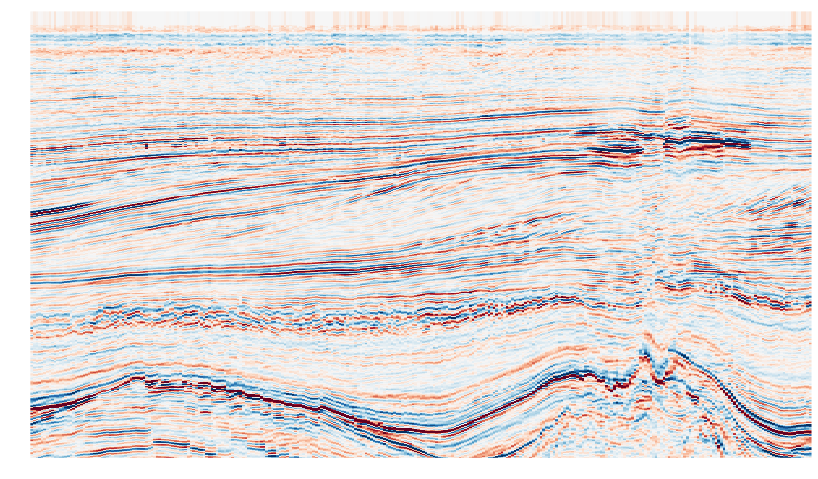

In [9]:
# Make figure
plt.figure(figsize=(14, 8), frameon=False)
plt.axis('off')

# Again: interpolation introduces new colours.
plt.imshow(x, cmap=cmap, interpolation='none', aspect='auto', vmin=-vm, vmax=vm)
plt.savefig('data/test.png', bbox_inches='tight')
plt.show()

Now go to [Preprocess_image](Preprocess_image.ipynb) or [Recover_data](Recover_data.ipynb) to continue the workflow.